In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

from get_historical_prices import HistoricalPrices

In [32]:
hp = HistoricalPrices(prices_dir='../prices')
hp.get_prices()
prices = hp.prices
prices.head()

100%|██████████| 965/965 [00:46<00:00, 10.66it/s]


high        low   adjclose      volume
ticker date                                                   
CSCO   2012-01-03  18.860001  18.480000  14.852622  41236600.0
       2012-01-04  19.000000  18.350000  15.139630  52927700.0
       2012-01-05  19.000000  18.670000  15.083825  37865300.0
       2012-01-06  19.000000  18.830000  15.028019  27796900.0
       2012-01-09  19.100000  18.790001  15.123683  37811500.0

In [33]:
pivoted_prices = prices.reset_index(level=0).pivot(columns='ticker', values='adjclose').dropna(axis=1)
print(pivoted_prices.shape)
pivoted_prices.head()

(1896, 795)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XPO,XRAY,XRX,XYL,Y,YUM,ZBRA,ZG,ZION,ZNGA
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.242914,20.893423,4.877474,68.042702,51.464207,33.846745,18.250000,22.961781,31.544683,12.493333,...,11.84,33.780727,17.453468,22.564072,280.063232,34.874527,35.720001,7.193639,15.602491,9.45
2012-01-04,24.050198,21.391426,4.791737,69.637924,51.740776,33.962326,18.110001,22.872713,31.221191,12.266666,...,11.72,33.771179,17.347052,23.309027,280.200897,35.112701,35.450001,7.174930,15.946727,9.19
2012-01-05,24.588482,21.187698,5.210895,70.081047,52.315197,34.220150,18.270000,22.820084,31.439375,12.500000,...,11.73,33.799828,17.240623,22.976940,281.105408,35.380634,35.400002,7.171812,16.393312,8.91
2012-01-06,24.854307,20.734968,5.334737,70.405983,52.862103,34.309063,18.139999,22.613623,31.311480,12.486667,...,11.83,33.599327,17.240623,22.591002,281.626495,35.636677,35.110001,7.184284,16.411919,8.81
2012-01-09,25.505566,21.346159,5.449052,70.386292,52.778248,34.291283,18.209999,22.609575,31.176056,12.396667,...,11.70,33.437008,17.219339,22.680748,280.151733,35.499722,34.950001,7.181166,16.635208,8.00


In [45]:
returns = pivoted_prices.pct_change()
returns.drop(returns.index[:1], inplace=True)
returns = returns.iloc[:,:490]
print(returns.shape)
returns.head()

(1895, 490)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,MS,MSCI,MSFT,MSI,MSM,MTB,MTD,MTN,MU,MUR
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007949,0.023835,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.010255,-0.018143,...,-0.008706,-0.014020,0.023534,-0.005577,0.012589,-0.000128,-0.001312,-0.022767,0.034024,-0.010670
2012-01-05,0.022382,-0.009524,0.087475,0.006363,0.011102,0.007591,0.008835,-0.002301,0.006988,0.019022,...,0.021330,0.011438,0.010219,0.006687,0.010222,0.015379,0.011302,-0.023298,0.024320,-0.010437
2012-01-06,0.010811,-0.021368,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.004068,-0.001067,...,-0.023342,0.011614,0.015535,-0.002571,-0.008507,0.002777,0.009421,0.003932,0.005587,-0.003163
2012-01-09,0.026203,0.029476,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.004325,-0.007208,...,0.018868,-0.003927,-0.013163,-0.007948,0.013285,0.002265,0.005085,0.021671,0.012500,0.000529
2012-01-10,0.018760,0.001060,0.000000,0.000840,0.003580,0.011408,-0.002746,0.004655,0.013514,0.006453,...,0.042593,0.016682,0.003605,0.002382,-0.003687,0.006405,0.035351,0.029900,-0.005487,0.043355


## Perform the PCA on the returns

In [47]:
from sklearn.decomposition import PCA
svd_solver = 'full'
num_factors = 10
pca = PCA(n_components=num_factors, svd_solver=svd_solver)
pca.fit(returns)
print(pca.components_.shape)
pca.components_[:3]

(10, 490)


array([[ 0.05240074,  0.06443916,  0.0588104 , ...,  0.03727665,
         0.07905201,  0.06601756],
       [-0.02271173,  0.08630469, -0.05591501, ..., -0.04135633,
         0.01259858,  0.19182931],
       [ 0.01641084,  0.01659071,  0.03536236, ...,  0.00431222,
         0.08519587, -0.03487473]])

## Factor Exposures

In [48]:
factor_exposures = pd.DataFrame(pca.components_.T, index=returns.columns, columns=np.arange(num_factors))
print(factor_exposures.shape)
factor_exposures.head()

(490, 10)


,0,1,2,3,4,5,6,7,8,9
ticker,,,,,,,,,,
A,0.052401,-0.022712,0.016411,-0.014618,-0.028228,0.017917,-0.016886,-0.034681,-0.012798,0.014978
AA,0.064439,0.086305,0.016591,-0.006517,-0.047150,0.022405,0.120128,0.001991,-0.016063,0.045077
AAL,0.058810,-0.055915,0.035362,0.077409,0.011855,-0.084137,0.122984,0.112857,-0.243154,0.074889
AAP,0.037263,-0.022382,-0.029664,0.040386,0.047142,-0.106812,-0.013068,-0.012306,-0.001233,-0.036028
AAPL,0.040505,-0.014723,0.020528,-0.020347,-0.073357,-0.001706,-0.017538,-0.007541,-0.004641,-0.023653


## Factor Returns

In [49]:
factor_returns = pd.DataFrame(pca.transform(returns), index=returns.index, columns=np.arange(num_factors))
print(factor_returns.shape)
factor_returns.head()

(1895, 10)


,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2012-01-04,-0.025133,0.129713,0.018905,0.042848,0.018670,-0.048421,0.046782,-0.035983,-0.032134,0.015882
2012-01-05,0.145733,-0.047109,0.018959,0.006345,0.019672,0.012511,0.008184,0.066732,-0.022576,-0.012454
2012-01-06,-0.025748,-0.018413,0.062906,-0.025301,0.024296,-0.031377,-0.018016,0.039099,-0.049890,-0.008004
2012-01-09,0.098655,-0.002890,0.054929,0.034325,-0.004621,0.018536,0.031032,0.038441,0.010619,0.030255
2012-01-10,0.330967,-0.019912,0.005158,0.049009,-0.021966,0.013615,0.022286,-0.026577,0.013531,-0.015219


## Idiosyncratic Risk Matrix

Let's review how we can calculate the Idiosyncratic Risk Matrix $\textbf{S}$. We know that: 

$$
\textbf{s} = \textbf{r} - \textbf{B}\textbf{f}
$$

In [50]:
common_returns = pd.DataFrame(np.dot(factor_returns, factor_exposures.T), 
                              index=returns.index, columns=returns.columns)

residuals = (returns - common_returns)
print(residuals.shape)
residuals.head()

(1895, 490)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,MS,MSCI,MSFT,MSI,MSM,MTB,MTD,MTN,MU,MUR
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.003083,0.009411,-0.027823,0.020764,0.010848,0.005005,0.018240,0.003335,0.002445,-0.013008,...,-0.007007,-0.006461,0.032362,-0.000490,0.007944,0.001818,0.004533,-0.015415,0.035882,-0.028741
2012-01-05,0.016138,-0.015392,0.062834,0.001045,0.005957,0.000645,-0.000187,-0.007702,0.000462,0.014038,...,0.005693,0.005518,0.005184,0.002860,0.009239,0.004855,0.006130,-0.028423,0.005399,-0.009408
2012-01-06,0.012121,-0.015833,0.007328,0.003471,0.010706,-0.003034,-0.012007,-0.009578,0.001565,0.001754,...,-0.023515,0.013507,0.017634,-0.000172,-0.000687,0.003814,0.012401,0.005059,-0.002485,0.001062
2012-01-09,0.021646,0.017050,0.004641,0.000402,-0.004762,-0.000785,0.000907,-0.001562,-0.002327,-0.009834,...,0.005968,-0.007312,-0.013768,-0.010499,0.008054,-0.006987,0.001401,0.018857,-0.005022,0.000319
2012-01-10,0.000589,-0.021376,-0.018459,-0.011843,-0.010922,0.003517,-0.014854,-0.006446,0.008424,-0.002765,...,0.017981,0.000907,-0.012228,-0.010439,-0.021163,-0.009695,0.017364,0.016364,-0.030200,0.031426


In [51]:
specific_var_matrix = pd.DataFrame(np.diag(np.var(residuals, axis=0, ddof=1)), index=returns.columns, columns=returns.columns)
print(specific_var_matrix.shape)
specific_var_matrix.head()

(490, 490)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,MS,MSCI,MSFT,MSI,MSM,MTB,MTD,MTN,MU,MUR
ticker,,,,,,,,,,,,,,,,,,,,,
A,0.000108,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA,0.000000,0.000297,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAL,0.000000,0.000000,0.000322,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAP,0.000000,0.000000,0.000000,0.000273,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.000000,0.000000,0.000000,0.000000,0.000181,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Factor Covariance Matrix

To calculate the annualized factor covariance matrix, $\textbf{F}$, we use the following equation:

$$
\textbf{F} = \frac{1}{N -1}\textbf{f}\textbf{f}^T
$$

where, $N$ is the number of elements in $\textbf{f}$. Recall that the factor covariance matrix, $\textbf{F}$, is a diagonal matrix.

In [52]:
ann_factor = 252
factor_cov_matrix = np.diag(factor_returns.var(axis=0, ddof=1)) * ann_factor
factor_cov_matrix.shape

(10, 10)

## View The Percent of Variance Explained by Each Factor

<Container object of 10 artists>

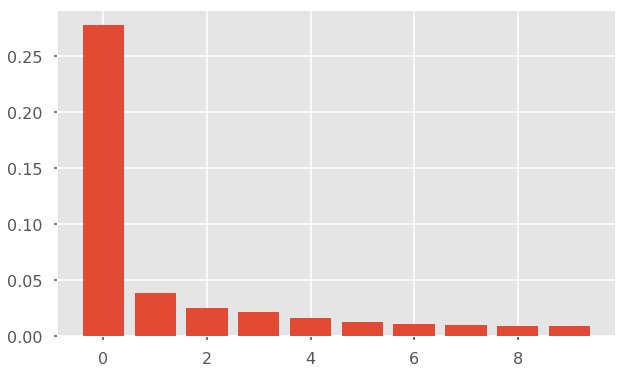

In [53]:
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.bar(np.arange(num_factors), pca.explained_variance_ratio_)

## View the factor returns

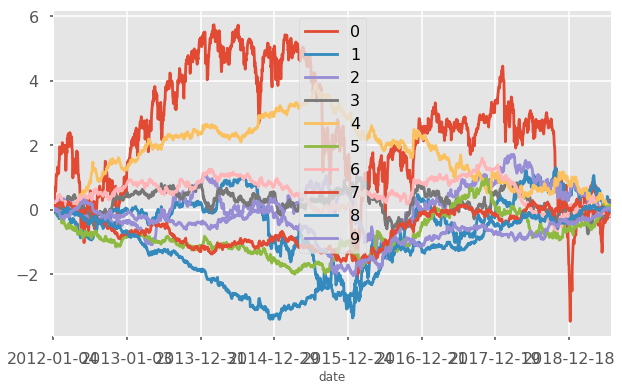

In [54]:
factor_returns.loc[:,0:20].cumsum().plot();